In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [65]:
# number of sampling points
N = 4096
# photon energy in eV
E0 = 8800

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 23e-6,
    'sigma_y': 23e-6,
    'rangeFactor': 10,
    'scaleFactor': 10,
    'z_source': 650-26
}

### Define beamline

In [66]:
# initialize the beam

f=1.5
b1 = beam.Beam(beam_params=beam_params)

s3 = optics.Slit('s3', z=785, x_width=133e-6, y_width=133e-6)

im_us = optics.PPM('im_us', z=785.1, FOV=1e-3)

crl0 = optics.CRL('crl0', z=790, f=f, diameter=300e-6, orientation=0, E0=E0)
crl1 = optics.CRL('crl1', z=790, f=f, diameter=300e-6, orientation=1, E0=E0)

im_ds = optics.PPM('im_ds', z=790.01, FOV=1e-3)

s_air = optics.Slit('s_air', z=791.9, x_width=20e-6, y_width=20e-6)

focus = optics.PPM('focus', z=crl0.z+f+.014, FOV=40e-6)

detector = optics.PPM('detector', z=focus.z+4, FOV=1e-3)



devices = [s3,im_us,crl0,crl1,im_ds,focus, detector]

# initialize beamline
XPP_beamline = beamline.Beamline(devices)

FWHM in x: 38.3817560828058 microns
FWHM in y: 38.3817560828058 microns
FWHM Divergence (x): 2.3 μrad
FWHM Divergence (y): 2.3 μrad
11.796049460389744
11.796049460389744
x is focused
y is focused


### Propagation through monochromator at central photon energy

FWHM in x: 371.4169225372251 microns
FWHM in y: 371.4169225372251 microns
FWHM Divergence (x): 2.3 μrad
FWHM Divergence (y): 2.3 μrad
11.796049460389744
11.796049460389744
x is focused
y is focused
s3
zx: 161.000000
zy: 161.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 338869562.21 microns
zRy: 338869562.21 microns
remaining distance: 100000.00 microns
goal for zx: 161100000.00 microns
current zx: 161000000.00 microns
goal for zy: 161100000.00 microns
current zy: 161000000.00 microns
zx: 161.100000
zy: 161.100000
azimuth 0.00 mrad
im_us
zx: 161.100000
zy: 161.100000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 338869562.21 microns
zRy: 338869562.21 microns
remaining distance: 4900000.00 microns
goal for zx: 166000000.00 microns
current zx

<IPython.core.display.Javascript object>


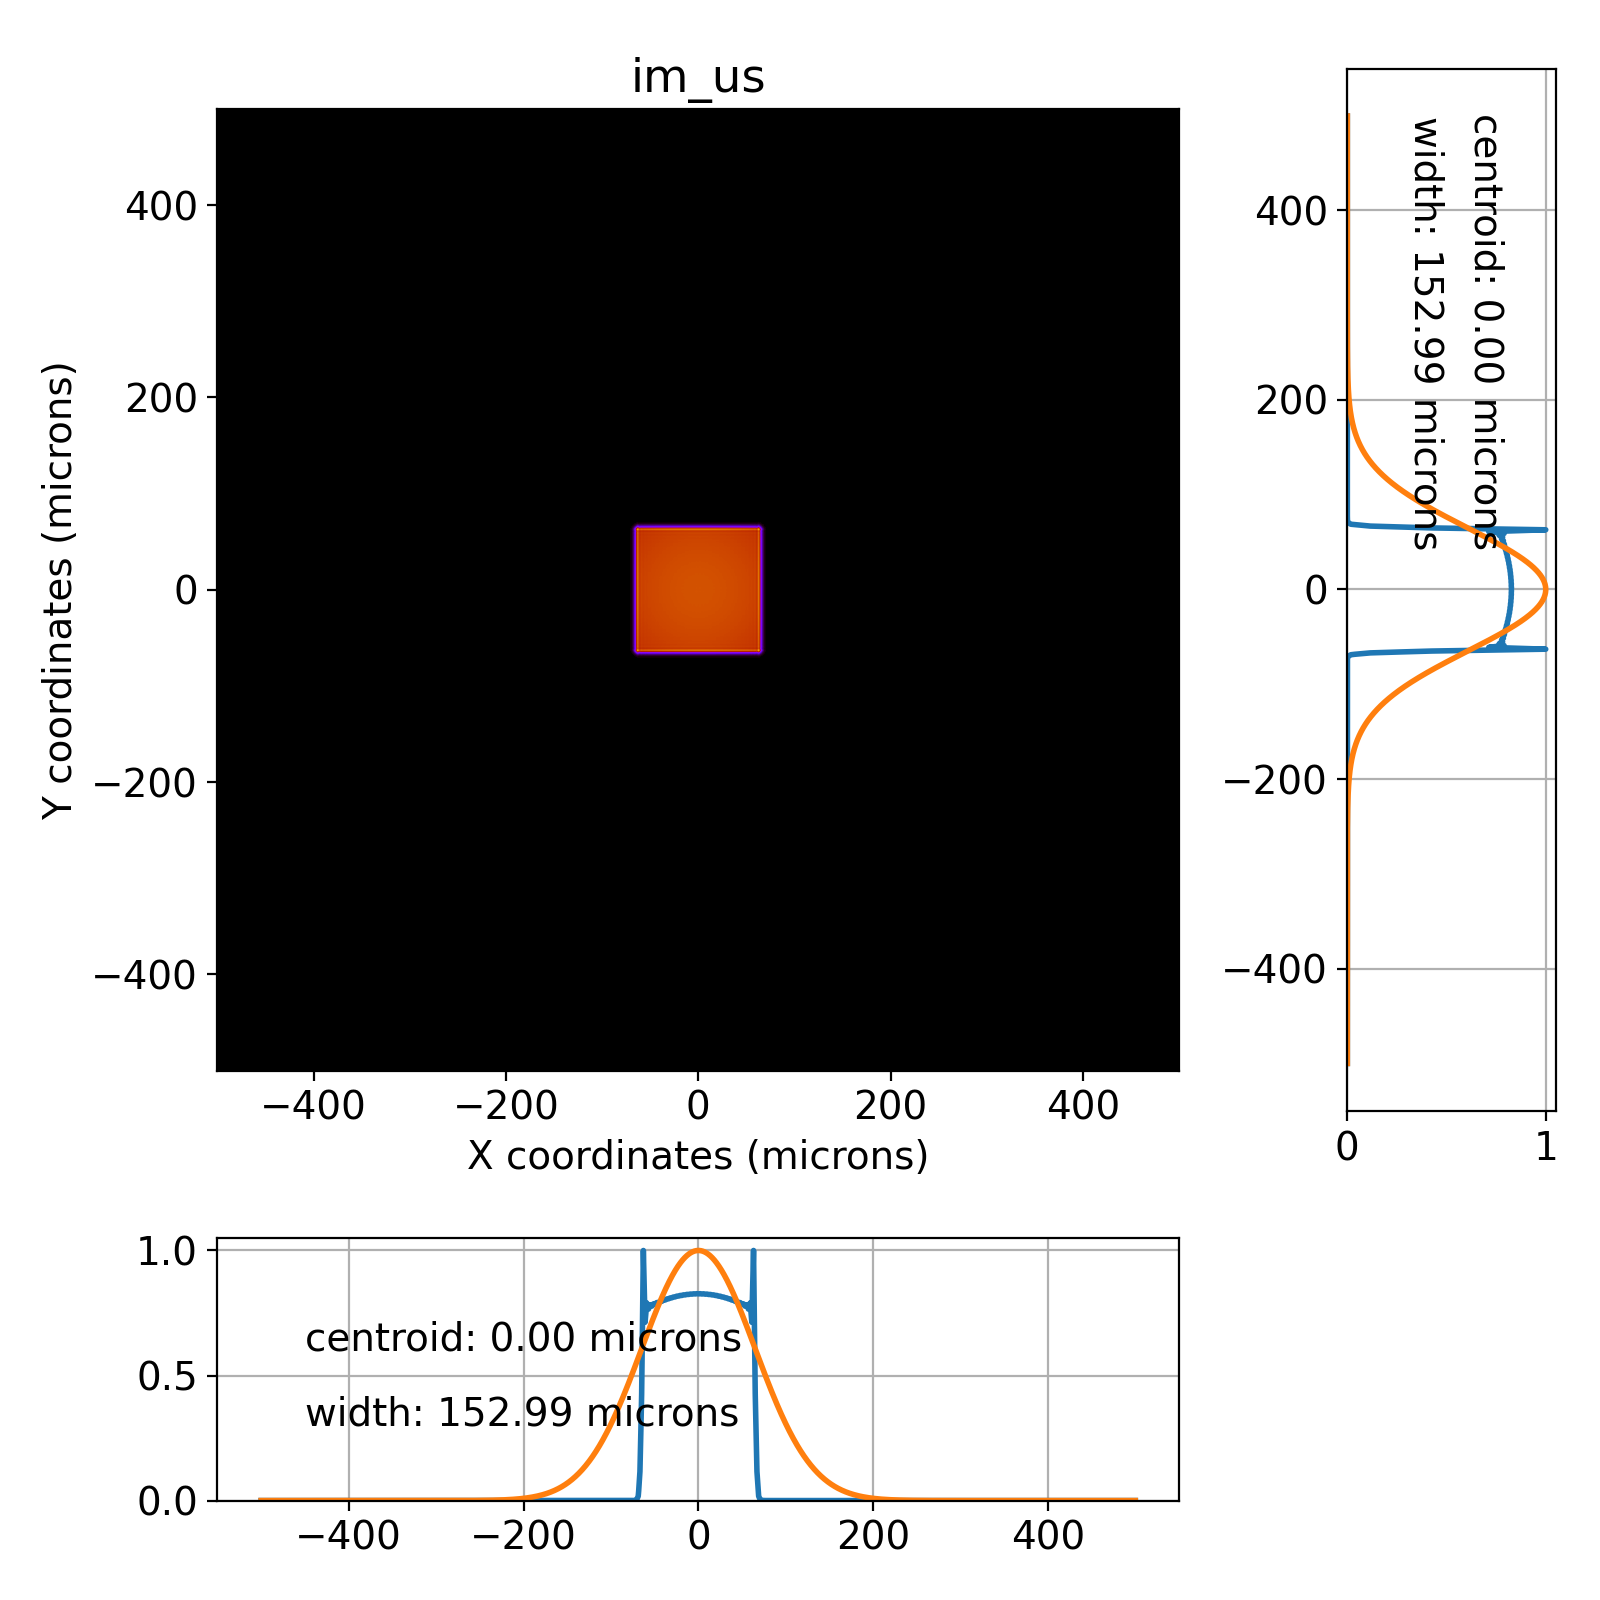

<IPython.core.display.Javascript object>


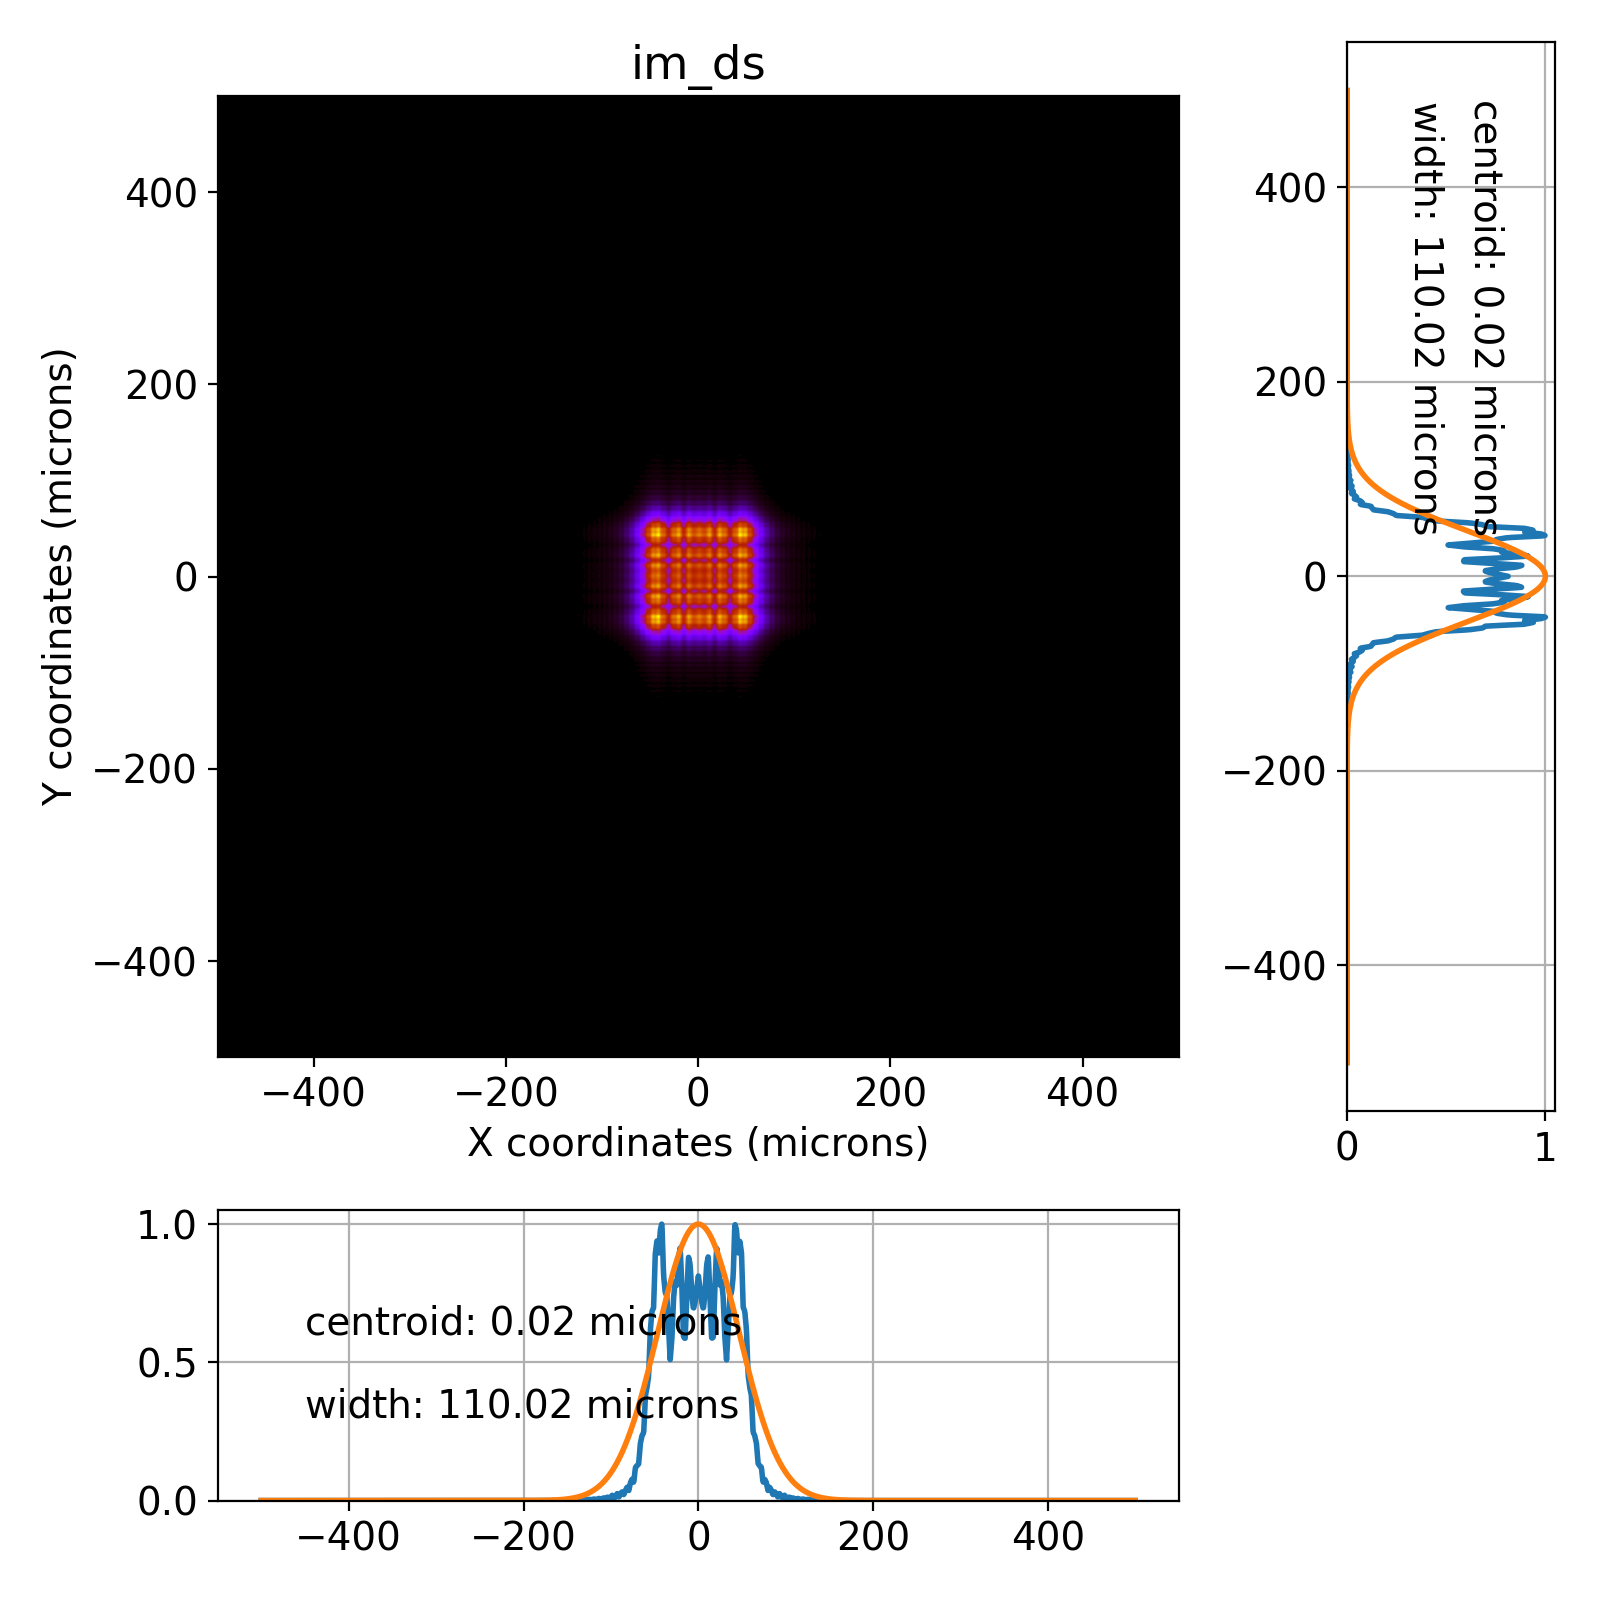

<IPython.core.display.Javascript object>


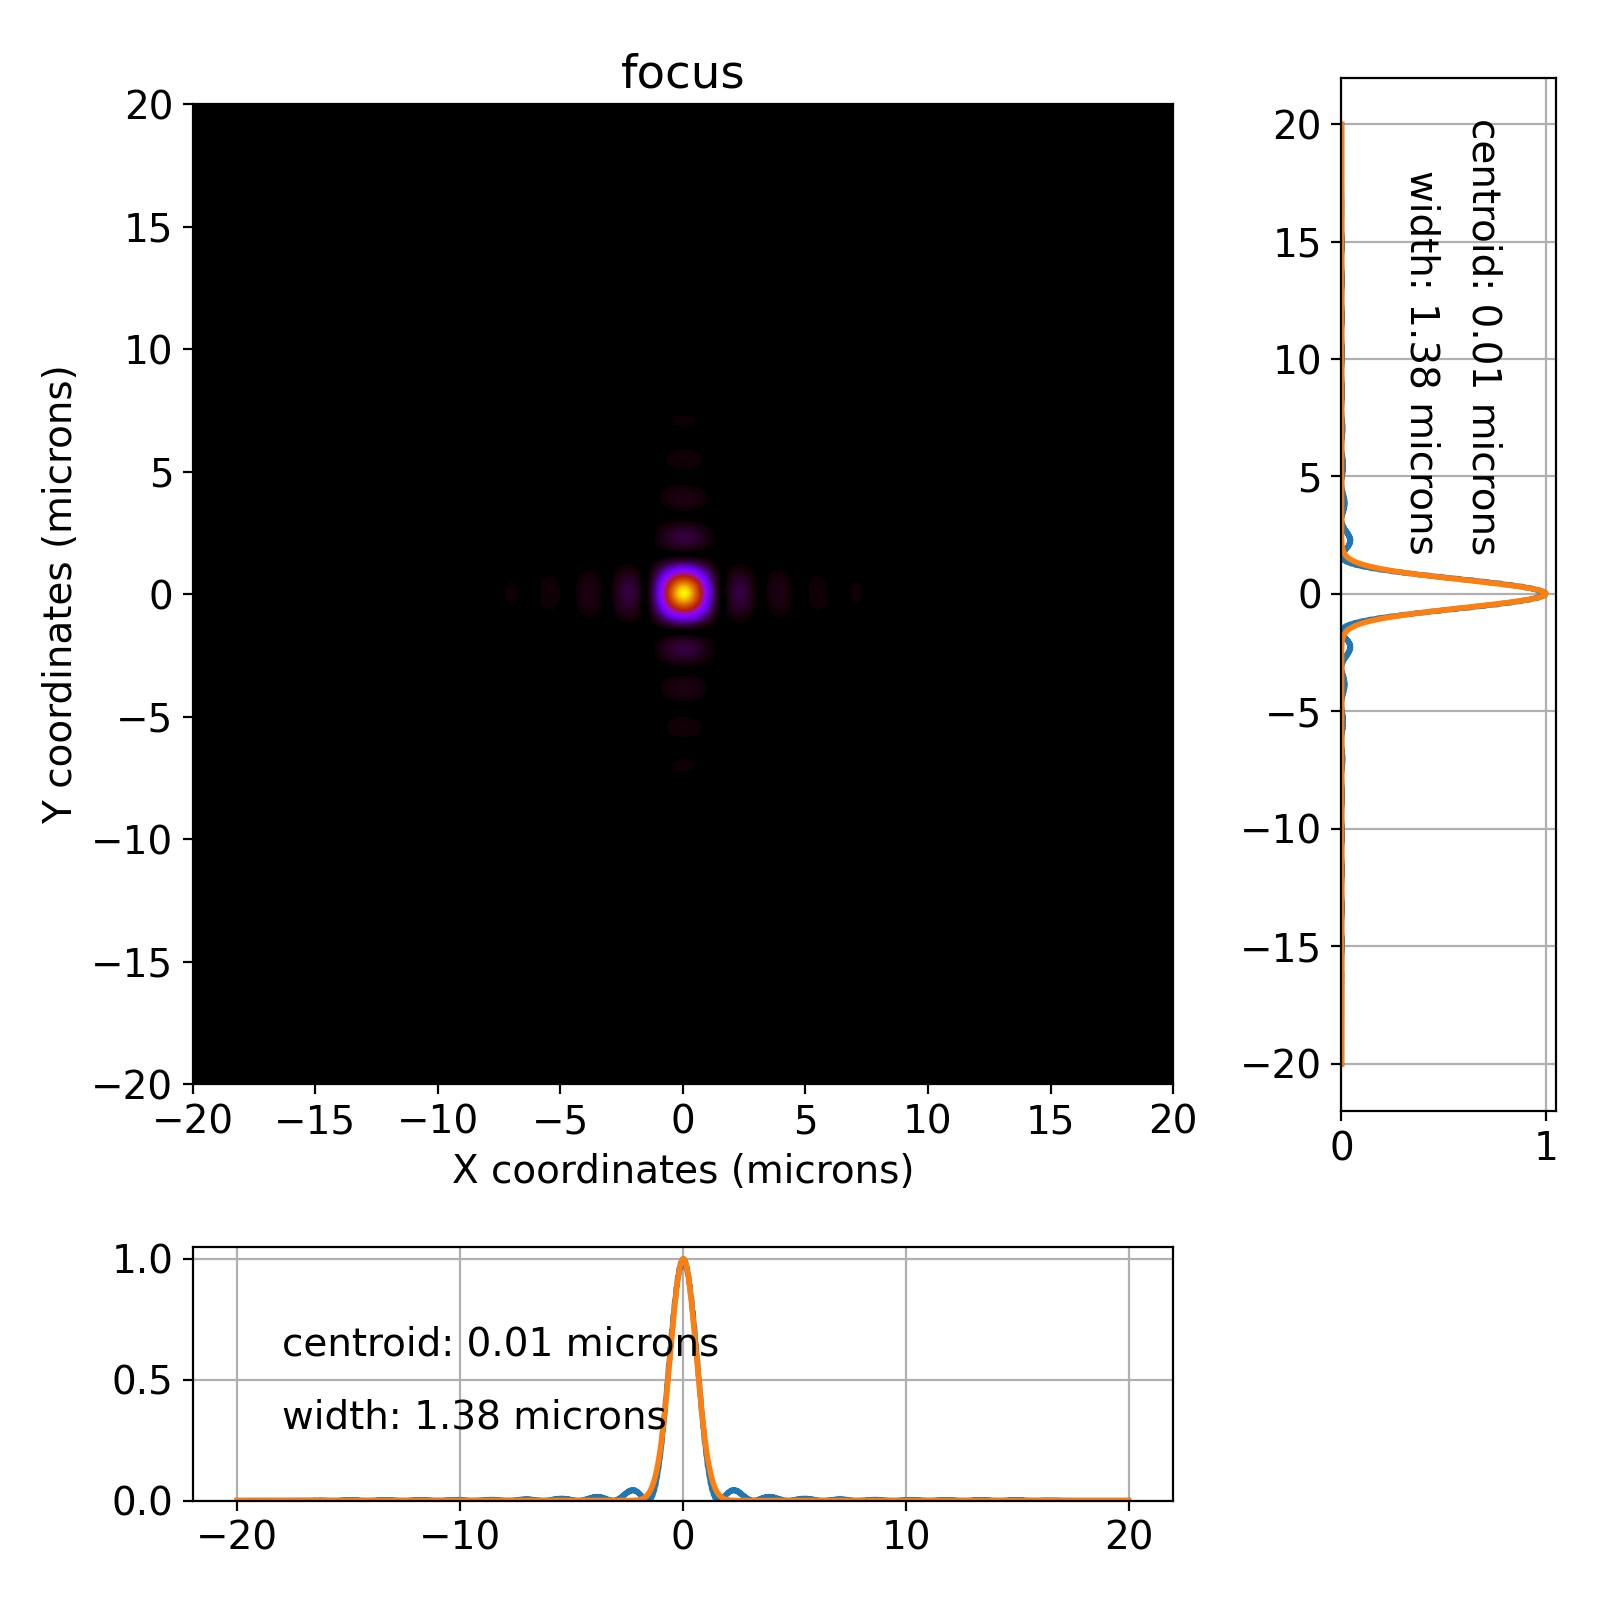

<IPython.core.display.Javascript object>


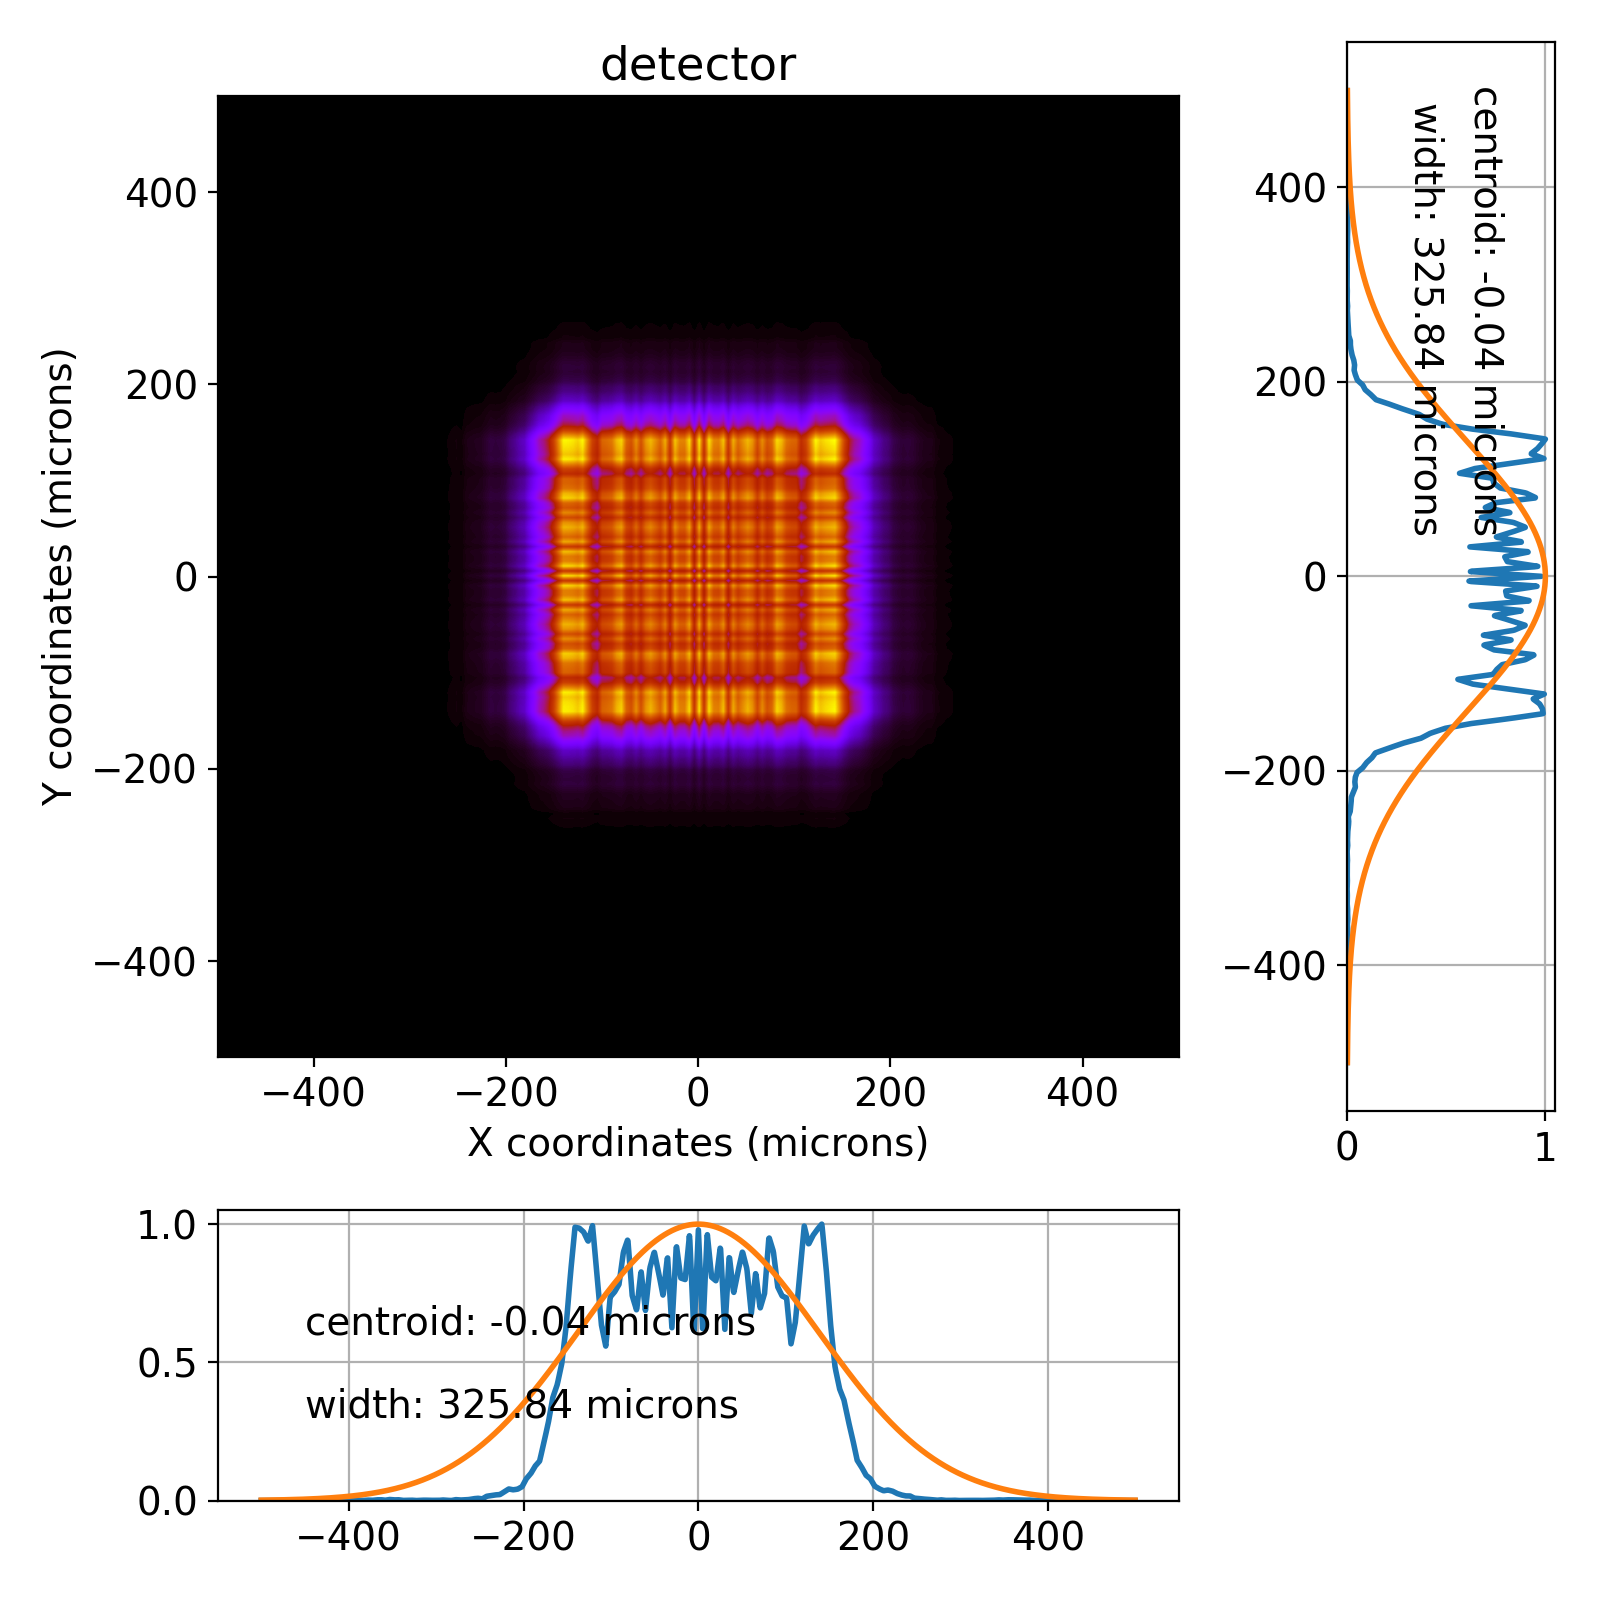

In [67]:
fig_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Run 18 Experiments/LW09/figures/'

# propagate
b2 = XPP_beamline.propagate_beamline(b1)

# view beam at various locations
XPP_beamline.im_us.view_beam()
XPP_beamline.im_ds.view_beam()
XPP_beamline.focus.view_beam()
# plt.savefig(fig_path+'focus_2m_100micron.png')
XPP_beamline.detector.view_beam()
# mono_beamline.im2.view_beam()

<IPython.core.display.Javascript object>


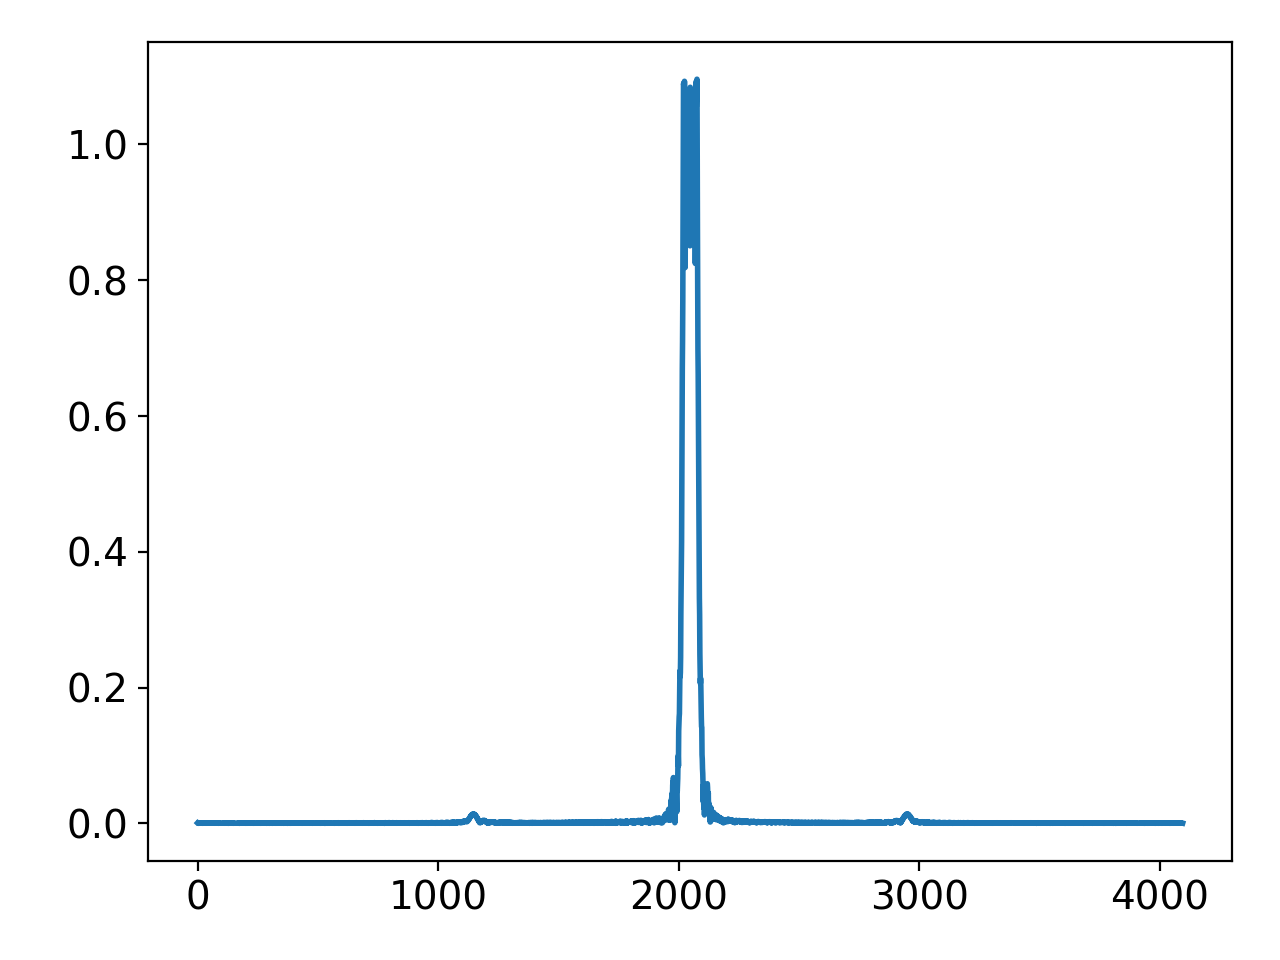

In [68]:
plt.figure()
plt.plot(np.abs(b2.wavex))